In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 
import pandas as pd
import cv2
import os

import pandas as pd
import numpy as np
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
import numpy as np
import keras.backend as K
from keras.models import Model
import matplotlib.pyplot as plt

import gc
from tqdm import tqdm
import matplotlib.pyplot as plt
# import pydot
from keras.datasets import mnist
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999
from sklearn.model_selection import train_test_split
from scipy import stats
# import config

np.random.seed(42)
import tensorflow as tf
from numpy import random
import keras as k
from keras.layers import Dense, Flatten, Conv2D, Conv3D

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
import PIL.Image
import PIL.ImageOps
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
# from imgaug import augmenters
from random import randint
pd.set_option('float_format', '{:.3f}'.format)
pylab.rcParams.update(params)
plt.rcParams['figure.figsize'] = (15, 15)
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999
pd.options.display.max_columns = 99
from pathlib import Path 

import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import  matplotlib.pyplot as plt

import cv2
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, ShiftScaleRotate
)
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose,RandomRotate90,ChannelShuffle,Blur
)
import numpy as np

Using TensorFlow backend.


# Loading the labels for every joint

In [ ]:
path_to_labels = '/content/drive/My Drive/RA2/Joint level model/Final labels erosion and narrowing/'
finger_fin_ip_erosion = pd.read_csv(path_to_labels+'left_hand_ip_joint_labels_erosion.csv')
del finger_fin_ip_erosion['Unnamed: 0']
foot_finger_erosion = pd.read_csv(path_to_labels+'foot_finger_joints_labels_erosion.csv')
del foot_finger_erosion['Unnamed: 0']
hand_finger_erosion = pd.read_csv(path_to_labels+'hand_finger_joints_labels_erosion.csv')
del hand_finger_erosion['Unnamed: 0']
wrist_labels_erosion = pd.read_csv(path_to_labels+'wrist_joints_labels_erosion.csv')
del wrist_labels_erosion['Unnamed: 0']

In [ ]:
finger_fin_ip_narrowing = pd.read_csv(path_to_labels+'left_hand_ip_joint_labels_narrowing.csv')
del finger_fin_ip_narrowing['Unnamed: 0']

foot_finger_narrowing = pd.read_csv(path_to_labels+'foot_finger_joints_labels_narrowing.csv')
del foot_finger_narrowing['Unnamed: 0']

hand_finger_narrowing = pd.read_csv(path_to_labels+'hand_finger_joints_labels_narrowing.csv')
del hand_finger_narrowing['Unnamed: 0']

wrist_labels_narrowing = pd.read_csv(path_to_labels+'wrist_joints_labels_narrowing.csv')
del wrist_labels_narrowing['Unnamed: 0']

In [ ]:
foot_finger_erosion.shape, hand_finger_erosion.shape, wrist_labels_erosion.shape, finger_fin_ip_erosion.shape

((2936, 2), (3670, 3), (734, 7), (734, 3))

# Merging the Foot labels and Hand IP labels

In [ ]:
foot_combined_labels = foot_finger_erosion.merge(foot_finger_narrowing, on='Joint_image_ID')
foot_combined_labels.columns = ['Joint_image_ID','label_0','label_1']
foot_combined_labels.head()



,Joint_image_ID,label_0,label_1
0,UAB001-LF-fin_1,0.000,0.000
1,UAB002-LF-fin_1,0.000,0.000
2,UAB003-LF-fin_1,0.000,0.000
3,UAB005-LF-fin_1,0.000,0.000
4,UAB006-LF-fin_1,0.000,0.000


In [ ]:
finger_ip_combined = finger_fin_ip_erosion.merge(finger_fin_ip_narrowing, on='Joint_image_ID', how='left')
finger_ip_combined.columns = ['Joint_image_ID', 'label_0', 'label_1','label_2']
finger_ip_combined.head()

,Joint_image_ID,label_0,label_1,label_2
0,UAB001-LH-fin_ip,0.000,0.000,0.000
1,UAB002-LH-fin_ip,0.000,0.000,0.000
2,UAB003-LH-fin_ip,0.000,0.000,0.000
3,UAB005-LH-fin_ip,0.000,0.000,0.000
4,UAB006-LH-fin_ip,0.000,0.000,0.000


In [ ]:
extracted_joints_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version'
joint_ids = pd.DataFrame(os.listdir(extracted_joints_path), columns = ['Joint_image_ID'])
joint_ids['image_id'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[0]
joint_ids['joint_name'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[2]
joint_ids['limb_name'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[1]

In [ ]:
#All hand finger joints and foot finger ip joint since thet have 4 labels
hands_fingers_ids = joint_ids[(joint_ids['joint_name'].isin(['fin_1','fin_2','fin_3','fin_4'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist()
foot_finger_ip_ids = joint_ids[(joint_ids['joint_name'].isin(['fin_ip'])) & (joint_ids['limb_name'].isin(['LF','RF']))]['Joint_image_ID'].tolist()
final_finger_joints_ids = sorted(hands_fingers_ids + foot_finger_ip_ids)
len(final_finger_joints_ids)
# Foot fin 1,2,3,4 joints since they have only2 labels
foot_fingers_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['fin_1','fin_2','fin_3','fin_4'])) & (joint_ids['limb_name'].isin(['LF','RF']))]['Joint_image_ID'].tolist())
#Hand finger ip joints since they have only 3 labels
hand_finger_fin_ip_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['fin_ip'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist())
# wrist since they have 12 labels
wrist_joint_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['wrist'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist())

In [ ]:
# will diagnose later today
img_ids = [img.split(".")[0] for img in hand_finger_fin_ip_ids]
joints_not_present = [id for id in img_ids  if id not in finger_ip_combined['Joint_image_ID'].tolist()]
final_hand_ip_finger_joints_ids = [img for img in hand_finger_fin_ip_ids if img.split(".")[0] not in joints_not_present]

In [ ]:

len(final_hand_ip_finger_joints_ids)

734

In [ ]:
fin_ip_hand_combined = pd.concat([finger_fin_ip_erosion, hand_finger_erosion], axis = 0)

# Filter the labels for the joints 

In [ ]:

def exif_transpose(img):
    if not img:
        return img

    exif_orientation_tag = 274

    # Check for EXIF data (only present on some files)
    if hasattr(img, "_getexif") and isinstance(img._getexif(), dict) and exif_orientation_tag in img._getexif():
        exif_data = img._getexif()
        orientation = exif_data[exif_orientation_tag]

        # Handle EXIF Orientation
        if orientation == 1:
            # Normal image - nothing to do!
            pass
        elif orientation == 2:
            # Mirrored left to right
            img = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 3:
            # Rotated 180 degrees
            img = img.rotate(180)
        elif orientation == 4:
            # Mirrored top to bottom
            img = img.rotate(180).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 5:
            # Mirrored along top-left diagonal
            img = img.rotate(-90, expand=True).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 6:
            # Rotated 90 degrees
            img = img.rotate(-90, expand=True)
        elif orientation == 7:
            # Mirrored along top-right diagonal
            img = img.rotate(90, expand=True).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 8:
            # Rotated 270 degrees
            img = img.rotate(90, expand=True)

    return img


def load_image_file(file, mode='RGB'):
    # Load the image with PIL
    img = PIL.Image.open(file)

    if hasattr(PIL.ImageOps, 'exif_transpose'):
        # Very recent versions of PIL can do exit transpose internally
        img = PIL.ImageOps.exif_transpose(img)
    else:
        # Otherwise, do the exif transpose ourselves
        img = exif_transpose(img)

    img = img.convert(mode)

    return np.array(img)

def get_image_to_array(PATH, file, size):
    img = cv2.imread(os.path.join(PATH, file))
    img = cv2.resize(img, (size,size))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    return img

def get_input_img_array(path, max_size, min_size):
    image = load_image_file(path)
    image = cv2.resize(image, (max_size, min_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32)/255.
    return image

def get_output_labels_for_image(image_id, label_df, col_type = None):
#     label_mapping_dict = {
#     'LF_erosion': ['LF_mtp_E__ip', 'LF_mtp_E__1', 'LF_mtp_E__2', 'LF_mtp_E__3',
#        'LF_mtp_E__4', 'LF_mtp_E__5'],
# 'LF_narrowing': ['LF_mtp_J__1', 'LF_mtp_J__2',
#        'LF_mtp_J__3', 'LF_mtp_J__4', 'LF_mtp_J__5', 'LF_mtp_J__ip'],
# 'RF_erosion': ['RF_mtp_E__ip', 'RF_mtp_E__1', 'RF_mtp_E__2', 'RF_mtp_E__3',
#        'RF_mtp_E__4', 'RF_mtp_E__5'],
# 'RF_narrowing': ['RF_mtp_J__1', 'RF_mtp_J__2',
#        'RF_mtp_J__3', 'RF_mtp_J__4', 'RF_mtp_J__5', 'RF_mtp_J__ip'],
       
# 'LH_erosion':['LH_mcp_E__ip', 'LH_pip_E__2', 'LH_pip_E__3', 'LH_pip_E__4',
#        'LH_pip_E__5', 'LH_mcp_E__1', 'LH_mcp_E__2', 'LH_mcp_E__3',
#        'LH_mcp_E__4', 'LH_mcp_E__5', 'LH_wrist_E__mc1', 'LH_wrist_E__mul',
#        'LH_wrist_E__nav', 'LH_wrist_E__lunate', 'LH_wrist_E__radius',
#        'LH_wrist_E__ulna'],
# 'LH_narrowing' :['LH_pip_J__2', 'LH_pip_J__3', 'LH_pip_J__4',
#        'LH_pip_J__5', 'LH_mcp_J__1', 'LH_mcp_J__2', 'LH_mcp_J__3',
#        'LH_mcp_J__4', 'LH_mcp_J__5', 'LH_wrist_J__cmc3', 'LH_wrist_J__cmc4',
#        'LH_wrist_J__cmc5', 'LH_wrist_J__mna', 'LH_wrist_J__capnlun',
#        'LH_wrist_J__radcar'],
# 'RH_erosion':['RH_mcp_E__ip', 'RH_pip_E__2', 'RH_pip_E__3', 'RH_pip_E__4',
#        'RH_pip_E__5', 'RH_mcp_E__1', 'RH_mcp_E__2', 'RH_mcp_E__3',
#        'RH_mcp_E__4', 'RH_mcp_E__5', 'RH_wrist_E__mc1', 'RH_wrist_E__mul',
#        'RH_wrist_E__nav', 'RH_wrist_E__lunate', 'RH_wrist_E__radius',
#        'RH_wrist_E__ulna'],
# 'RH_narrowing' :['RH_pip_J__2', 'RH_pip_J__3', 'RH_pip_J__4',
#        'RH_pip_J__5', 'RH_mcp_J__1', 'RH_mcp_J__2', 'RH_mcp_J__3',
#        'RH_mcp_J__4', 'RH_mcp_J__5', 'RH_wrist_J__cmc3', 'RH_wrist_J__cmc4',
#        'RH_wrist_J__cmc5', 'RH_wrist_J__mna', 'RH_wrist_J__capnlun',
#        'RH_wrist_J__radcar']
# }
    columns = label_df.columns.tolist()[1:]
    return label_df[label_df['Joint_image_ID'] == image_id.split(".")[0]][columns].values.tolist()


def augmentating_images(images):
    'Apply data augmentation'
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    seq = iaa.Sequential(
            [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5),  # horizontally flip 50% of all images
            iaa.Flipud(0.2),  # vertically flip 20% of all images

            # execute 0 to 5 of the following (less important) augmenters per image
            # don't execute all of them, as that would often be way too strong
            iaa.SomeOf((0, 3),
                        [
                            # sometimes(iaa.Superpixels(p_replace=(0, 1.0),
                            #                                 n_segments=(20, 200))),
                            # # convert images into their superpixel representation
                            iaa.OneOf([
                                    iaa.GaussianBlur((0, 1.0)),
                                    # blur images with a sigma between 0 and 3.0
                                    iaa.AverageBlur(k=(1, 1)),
                                    # blur image using local means with kernel sizes between 2 and 7
                                    iaa.MedianBlur(k=(1, 1)),
                                    # blur image using local medians with kernel sizes between 2 and 7
                            ]),
                            
                            sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))),
                            # sometimes move parts of the image around
                            sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
                        ],
                        random_order=True
                        )
            ],
            random_order=True
    )
    images_aug = seq.augment_image(images)
    return images_aug


def strong_aug(p=0.5):
    return Compose([
        RandomRotate90(),
        HorizontalFlip(p=1),
        # RandomGridShuffle(grid=(5, 5), p=0.1),
        Flip(),
        Transpose(),
        ChannelShuffle(p=1),
        # ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
        # OneOf([
        # OpticalDistortion(p=0.3),
        # GridDistortion(p=0.1),
        # IAAPiecewiseAffine(p=0.4),
        # ], p=0.4),
        ], p=p)


#Data generator
def RA_image_generator(image_path, image_ids, label_file, augment = True, batch_size = 32, size = 800):
    while True:
        batch_input = []
        batch_output = []
        batch_ids = list(np.random.choice(image_ids, batch_size))
        for img in batch_ids:
            image_final_path = os.path.join(image_path, img)
            image = get_input_img_array(image_final_path, size)
            output = get_output_labels_for_image(img, label_df = label_file, col_type = 'erosion')

            #Augmenetations to the image
            if augment:
                data = {}
                data['image'] = image
                augmentation = strong_aug(p=0.5)
                image = augmentation(**data)["image"]
            
            batch_input += [image]
            batch_output += output
        
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        yield (batch_x, batch_y)

In [ ]:
# image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_v4/'
# img, labels = next(RA_image_generator(image_path, final_foot_finger_joints_ids, hand_finger, augment =False, batch_size = 8, size = 224))

In [ ]:
# plt.imshow(img[2])

# New data generator

In [ ]:

def get_input_img_array(path, max_size, min_size):
    image = load_image_file(path)
    image = cv2.resize(image, (max_size, min_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32)/255.
    return image


def RA_image_generator_rev(image_path, image_ids, label_file, augment = True, batch_size = 32, max_size = 800, min_size = 800):
    while True:
        for idx_start in range(0, len(image_ids), batch_size):
            batch_input = []
            batch_output = []

            idx_end = min(batch_size + idx_start, len(image_ids))

            # print(idx_start, idx_end)
            
            batch_ids = [image for image in image_ids if image not in ['desktop.ini']][idx_start:idx_end]
            # batch_ids = list(np.random.choice(image_ids, batch_size))
            for img in batch_ids:
                image_final_path = os.path.join(image_path, img)
                image = get_input_img_array(image_final_path, max_size, min_size)
                output = get_output_labels_for_image(img, label_df = label_file)

                #Augmenetations to the image
                if augment:
                    data = {}
                    data['image'] = image
                    augmentation = strong_aug(p=0.5)
                    image = augmentation(**data)["image"]
                
                batch_input += [image]
                batch_output += output

            batch_x = np.array(batch_input)
            batch_y = np.array(batch_output)
            yield (batch_x, batch_y)

# Keras imports for various models
- Densenet
- VGG
- Efficient net (B0 - B6)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications import InceptionV3, DenseNet121, DenseNet169
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, GlobalMaxPool1D, multiply, LocallyConnected2D, Lambda, TimeDistributed, Bidirectional, LSTM, Reshape
from keras.layers import BatchNormalization
from keras.metrics import mean_absolute_error
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.backend import expand_dims, squeeze
# IITALLING EFFICIENT NET
!pip install git+https://github.com/qubvel/efficientnet
from efficientnet.keras import EfficientNetB3, EfficientNetB4, EfficientNetB5
!pip install keras-radam
from keras_radam import RAdam
from keras.applications.resnet50 import ResNet50

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-tj4y3k0b
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-tj4y3k0b
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18327 sha256=33390b4ec6498e02930bf8f3ded482bc26dde246676077b0567fd3b677209ebe
  Stored in directory: /tmp/pip-ephem-wheel-cache-2euwdmk5/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
  Created wheel for keras-radam: filename=keras_radam-0.15.0-cp36-none-any.whl size=14685 sha256=918055cfed1f5c7e3ca2c207ad89f1060b49cadb7d0e0a74ea5fdcbdf112c107
  Stored in directory: /root/.cache/pip/wheels/79/a0/c0/670b0a118e8f078539fafec7bd02eba0af921f745660c7f83f
Successfully built keras-radam


# CNN model with Densenet backbone and Attention mask

In [ ]:
def rmse (y_true, y_pred):
  print(y_true, y_pred)
  return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

HUBER_DELTA = 1.1
import keras.backend as K
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

def smoothL1(y_true, y_pred):
    x = K.abs(y_true - y_pred)
    x = tf.where(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
    return  K.sum(x)


def model_with_attention_mask(ROWS, COLS, model_type, pretrained_model = 'DENSENET121'):
    if model_type == 'wrist':
        output_size = 6

    elif model_type == 'hand_finger':
        output_size = 2

    elif model_type == "foot_finger":
        output_size= 2
    elif model_type == "hand_ip":
        output_size = 3

    in_lay = Input((ROWS, COLS, 3))
    
    if pretrained_model == 'VGG':
        base_pretrained_model = VGG16(input_shape =  (ROWS, COLS, 3), include_top = False, weights = '/content/drive/My Drive/RA2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
        pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
        pt_features = base_pretrained_model(in_lay)
        
    elif pretrained_model == 'InceptionV3':
        layer_dict = dict([(layer.name, layer) for layer in base_pretrained_model.layers])
        base_pretrained_model = InceptionV3(weights='/content/drive/My Drive/RA2//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(ROWS, COLS,3))
        pt_depth = 2048
        pt_features = base_pretrained_model(in_lay)
        
    elif pretrained_model == 'DENSENET121':
        base_pretrained_model = DenseNet169(weights='/content/drive/My Drive/RA2/DenseNet-BC-169-32-no-top.h5',include_top=False,input_shape=(ROWS,COLS,3))

        base_pretrained_model.trainable = True
        pt_depth = 1664
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnet':
        base_pretrained_model = EfficientNetB3(weights='/content/drive/My Drive/RA2/efficientnet-b3_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 1536
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnetB4':
        base_pretrained_model = EfficientNetB4(weights='/content/drive/My Drive/RA2/efficientnet-b4_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 1792
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnetB5':
        base_pretrained_model = EfficientNetB5(weights='/content/drive/My Drive/RA2/efficientnet-b5_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 2048
        pt_features = base_pretrained_model(in_lay)

    model = Sequential()
    model.add(base_pretrained_model)
    bn_features = BatchNormalization()(pt_features)

    # here we do an attention mechanism to turn pixels in the GAP on an off
    attn_layer = Conv2D(512, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
    attn_layer = Conv2D(256, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = LocallyConnected2D(1, kernel_size = (1,1), padding = 'valid', activation = 'sigmoid')(attn_layer)

    # fan it out to all of the channels
    up_c2_w = np.ones((1, 1, 1, pt_depth))
    up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', activation = 'relu', use_bias = False, weights = [up_c2_w])
    up_c2.trainable = False
    attn_layer = up_c2(attn_layer)

    print(attn_layer.shape)
    print(bn_features.shape)


    mask_features = multiply([attn_layer, bn_features])
    gap_features = GlobalAveragePooling2D()(mask_features)
    gap_mask = GlobalAveragePooling2D()(attn_layer)

    # to account for missing values from the attention model
    gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
    
    gap_dr = Dropout(0.1)(gap)
    dr_steps = Dropout(0.1)(Dense(1024, activation = 'relu')(gap_dr))
    dr_steps = Dropout(0.1)(Dense(512, activation = 'relu')(gap_dr))
    out_layer = Dense(output_size, activation = 'relu')(dr_steps) # linear is what 16bit did
    
    #Defining the model for Erosion in Left foot with Attention Weights
    final_model = Model(inputs = [in_lay], outputs = [out_layer])

    # Make sure that the pre-trained bottom layers are not trainable
    for layer in final_model.layers:
        layer.trainable = True

    final_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae', rmse])
    return final_model

# Hand fingers (Fin_1, Fin_2, Fin_3, Fin_4) + Foot Fin_ip joint model

In [ ]:
hand_ip_model = model_with_attention_mask(224, 224, model_type = 'hand_ip_erosion', pretrained_model = 'efficientnetB5')
model_snapshot_path = "/content/drive/My Drive/RA2/Joint level model/Models/Hand IP models/" 

weight_path= model_snapshot_path + "{}_best.h5".format('hand_ip_erosion_enetB4_img_size_256_mse')

#Checkpoint for saving the model
checkpoint = ModelCheckpoint(weight_path, monitor='val_rmse', verbose=1, save_best_only=True, mode='min')

#Reducing the learning rate if model doesn't improve in 5 epochs
reduceLROnPlat = ReduceLROnPlateau(monitor='val_rmse', factor=0.75, patience=5, verbose=1, mode='auto', min_delta = 0.001, cooldown = 5, min_lr= 1e-5)

#Early stopping patinets of 25
early = EarlyStopping(monitor="val_rmse", mode="min", 
                      patience = 100) # probably needs to be more patient, but kaggle time is limited

callbacks_list = [checkpoint, early, reduceLROnPlat]
gc.collect()

(None, 7, 7, 2048)
(None, 7, 7, 2048)
Tensor("dense_3_target:0", shape=(None, None), dtype=float32) Tensor("dense_3/Relu:0", shape=(None, 2), dtype=float32)


39

In [ ]:
hand_ip_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b5 (Model)         (None, 7, 7, 2048)   28513520    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 2048)   8192        efficientnet-b5[1][0]            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 7, 7, 64)     131136      batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
from keras.utils import plot_model

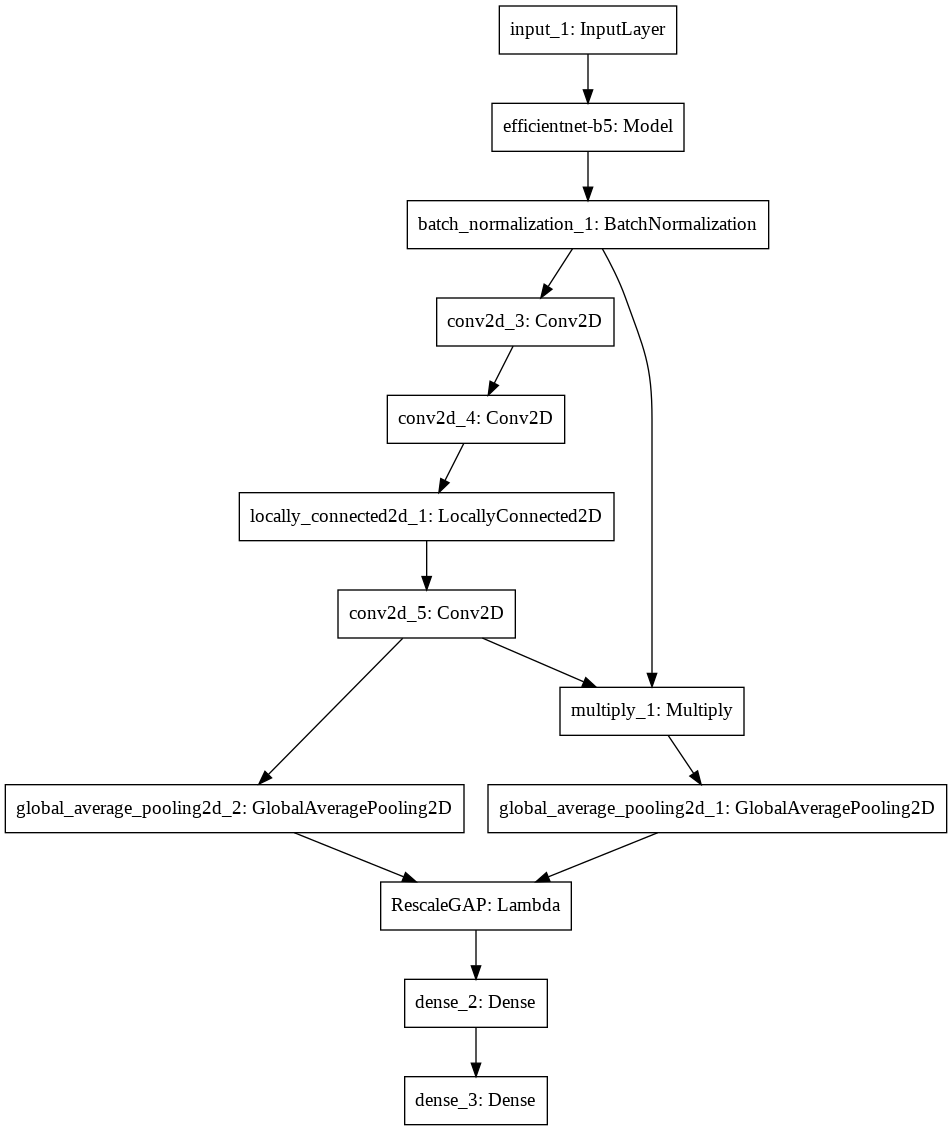

In [ ]:
plot_model(hand_ip_model)

# Assigning train and validation generators

In [ ]:
from sklearn.model_selection import train_test_split
train_ids, val_ids = train_test_split(final_hand_ip_finger_joints_ids, test_size = 0.25)
print(len(train_ids), len(val_ids))
# # image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
# # train_gen = RA_image_generator_rev(image_path, train_ids, finger_ip_combined, augment =False, batch_size = 8, max_size = 224, min_size = 224)
# # valid_gen = RA_image_generator_rev(image_path, val_ids, finger_ip_combined,   augment=False,  batch_size = 8, max_size = 224, min_size = 224)

550 184


In [ ]:
finger_fin_ip_erosion.head()

,Joint_image_ID,label_0,label_1
0,UAB001-LH-fin_ip,0.000,0.000
1,UAB002-LH-fin_ip,0.000,0.000
2,UAB003-LH-fin_ip,0.000,0.000
3,UAB005-LH-fin_ip,0.000,0.000
4,UAB006-LH-fin_ip,0.000,0.000


In [ ]:
# finger_fin_ip_narrowing['label_0'].value_counts()

# Analyzing the overall distortion in the joints

In [ ]:
finger_fin_ip_erosion['overall'] = np.sum(finger_fin_ip_erosion[finger_fin_ip_erosion.columns.tolist()[1:]], axis= 1)
finger_fin_ip_erosion.head()
finger_fin_ip_erosion['erosion_label'] = finger_fin_ip_erosion['overall'].apply(lambda x : 'high' if x>= 2 else 'low')
finger_fin_ip_erosion = finger_fin_ip_erosion[['Joint_image_ID','overall','erosion_label', 'label_0', 'label_1']]
finger_fin_ip_erosion['erosion_label'].value_counts()

low     685
high     49
Name: erosion_label, dtype: int64

In [ ]:
finger_fin_ip_erosion.head()

,Joint_image_ID,overall,erosion_label,label_0,label_1
0,UAB001-LH-fin_ip,0.000,low,0.000,0.000
1,UAB002-LH-fin_ip,0.000,low,0.000,0.000
2,UAB003-LH-fin_ip,0.000,low,0.000,0.000
3,UAB005-LH-fin_ip,0.000,low,0.000,0.000
4,UAB006-LH-fin_ip,0.000,low,0.000,0.000


In [ ]:
high_val_ids = np.random.choice(finger_fin_ip_erosion[finger_fin_ip_erosion['erosion_label']=='high']['Joint_image_ID'].tolist(), 15).tolist()
low_val_ids = np.random.choice(finger_fin_ip_erosion[finger_fin_ip_erosion['erosion_label']=='low']['Joint_image_ID'].tolist(), 35).tolist()
val_ids = list(np.unique(high_val_ids + low_val_ids))

train_ids = list(np.unique([trn + '.jpg' for trn in finger_fin_ip_erosion['Joint_image_ID'].tolist() if trn not in val_ids]))
val_ids = [val + ".jpg" for val in val_ids]
print(len(train_ids), len(val_ids))

687 47


In [ ]:
train_ids = [trn.split(".")[0] for trn in train_ids]

In [ ]:
train_ip_ids = finger_fin_ip_erosion[finger_fin_ip_erosion['Joint_image_ID'].isin(train_ids)]
train_ip_ids.shape

(687, 5)

In [ ]:
train_ip_ids['erosion_label'].value_counts()

low     652
high     35
Name: erosion_label, dtype: int64

In [ ]:
len(train_ids), train_ids[0]
train_ids = [trn + '.jpg' for trn in train_ids]

In [ ]:
train_ids[0]

'UAB001-LH-fin_ip.jpg'

In [ ]:
# Training with all the images

# Foot model was trained on this account

In [ ]:
image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
train_gen = RA_image_generator_rev(image_path, train_ids, finger_ip_combined, augment =True, batch_size = 16, max_size = 224, min_size = 224)
valid_gen = RA_image_generator_rev(image_path, val_ids, finger_ip_combined,   augment= False,  batch_size = 16, max_size = 224, min_size = 224)

In [ ]:
hand_ip_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch = len(train_ids)//16, 
                                                  validation_steps = len(val_ids)//16, callbacks = callbacks_list)

Epoch 1/300
34/34 [==============================] - 302s 9s/step - loss: 0.9382 - mae: 0.3924 - rmse: 0.5386 - val_loss: 0.5679 - val_mae: 0.3131 - val_rmse: 0.4149

Epoch 00001: val_rmse improved from inf to 0.41489, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Hand IP models/hand_ip_erosion_enetB4_img_size_256_mse_best.h5
Epoch 2/300
34/34 [==============================] - 63s 2s/step - loss: 0.8485 - mae: 0.3504 - rmse: 0.4779 - val_loss: 0.6929 - val_mae: 0.3185 - val_rmse: 0.4178

Epoch 00002: val_rmse did not improve from 0.41489
Epoch 3/300
34/34 [==============================] - 61s 2s/step - loss: 0.8425 - mae: 0.3460 - rmse: 0.4717 - val_loss: 0.8125 - val_mae: 0.3041 - val_rmse: 0.4082

Epoch 00003: val_rmse improved from 0.41489 to 0.40817, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Hand IP models/hand_ip_erosion_enetB4_img_size_256_mse_best.h5
Epoch 4/300
34/34 [==============================] - 61s 2s/step - loss: 0.852

In [ ]:
 
np.random.seed(17)
import random
epoch = 1
for i in range(3):
    if epoch <= 1:
        low_ids = np.random.choice(train_ip_ids[train_ip_ids['erosion_label'] == 'low']['Joint_image_ID'].tolist(), 40).tolist()
        high_ids = train_ip_ids[train_ip_ids['erosion_label'] == 'high']['Joint_image_ID'].tolist()
        final_ids = high_ids + low_ids
        final_ids = [img + ".jpg" for img in final_ids]
        
        image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
        train_gen = RA_image_generator_rev(image_path, final_ids, finger_ip_combined, augment =True, batch_size = 2, max_size = 256, min_size = 256)
        valid_gen = RA_image_generator_rev(image_path, val_ids, finger_ip_combined,   augment= False,  batch_size = 2, max_size = 256, min_size = 256)


    else:

        low_ids = np.random.choice(train_ip_ids[train_ip_ids['erosion_label'] == 'low']['Joint_image_ID'].tolist(), 300).tolist()
        high_ids = train_ip_ids[train_ip_ids['erosion_label'] == 'high']['Joint_image_ID'].tolist()
        final_ids = high_ids + low_ids
        final_ids = [img + ".jpg" for img in final_ids]
        image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
        train_gen = RA_image_generator_rev(image_path, final_ids, finger_ip_combined, augment =True, batch_size = 4, max_size = 256, min_size = 256)
        valid_gen = RA_image_generator_rev(image_path, val_ids, finger_ip_combined,   augment= False,  batch_size = 4, max_size = 256, min_size = 256)


    random.shuffle(final_ids)
    random.shuffle(val_ids)

    # # train_ids, val_ids = train_test_split(final_ids, test_size = 0.10)
    # # print(len(train_ids), len(val_ids))

    # image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
    # train_gen = RA_image_generator_rev(image_path, final_ids, finger_ip_combined, augment =True, batch_size = 4, max_size = 256, min_size = 256)
    # valid_gen = RA_image_generator_rev(image_path, val_ids, finger_ip_combined,   augment= False,  batch_size = 4, max_size = 256, min_size = 256)

    print("Training for Fold -> ", epoch)
    hand_ip_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 100, callbacks = callbacks_list, steps_per_epoch = len(final_ids)//4, 
                                        validation_steps = len(val_ids)//4)
    print("Training for Fold ", epoch , "completed")

    epoch += 1

Training for Fold ->  1
Epoch 1/100
19/19 [==============================] - 73s 4s/step - loss: 2.4627 - mae: 0.7905 - rmse: 0.9737 - val_loss: 0.5191 - val_mae: 0.8436 - val_rmse: 1.0612

Epoch 00001: val_rmse improved from inf to 1.06123, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Hand IP models/hand_ip_erosion_enetB4_img_size_256_mse_best.h5
Epoch 2/100
19/19 [==============================] - 9s 485ms/step - loss: 1.8009 - mae: 0.6961 - rmse: 0.8588 - val_loss: 0.0000e+00 - val_mae: 0.4563 - val_rmse: 0.6195

Epoch 00002: val_rmse improved from 1.06123 to 0.61947, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Hand IP models/hand_ip_erosion_enetB4_img_size_256_mse_best.h5
Epoch 3/100
19/19 [==============================] - 9s 488ms/step - loss: 2.6562 - mae: 0.8174 - rmse: 0.9900 - val_loss: 0.0000e+00 - val_mae: 0.7708 - val_rmse: 0.9615

Epoch 00003: val_rmse did not improve from 0.61947
Epoch 4/100
19/19 [========================

KeyboardInterrupt: ignored

# Diagnoising WHAT MODEL LEARNT -> Inference Model was not able to capture the relations between the joints ad the score

In [ ]:
# DL libraries
import keras.backend as K
import tensorflow as tf
from keras.models import load_model

HUBER_DELTA = 1.1
import keras.backend as K
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

def smoothL1(y_true, y_pred):
    x = K.abs(y_true - y_pred)
    x = tf.where(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
    return  K.sum(x)

model_weights = '/content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/hand_erosion_hand_ip_erosion_model_effnetB3_img_size_224_mse_augmented_best.h5'
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

depend = {'rmse': rmse}

loaded_model = load_model(model_weights,  custom_objects = depend)

In [ ]:
# train_ids, val_ids = train_test_split(final_foot_finger_joints_ids, test_size = 0.20)
# print(len(train_ids), len(val_ids))
# import random


len(fin_ip_hand_combined['Joint_image_ID'].tolist())
ids = [id + ".jpg" for id in fin_ip_hand_combined['Joint_image_ID'].tolist()]
from sklearn.model_selection import train_test_split
train_ids, val_ids = train_test_split(ids, test_size = 0.30)
print(len(train_ids), len(val_ids))


random.shuffle(val_ids)
image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
# train_gen = RA_image_generator_rev(image_path, train_ids, foot_combined_labels, augment = False, batch_size = 32, max_size = 224, min_size = 224)
valid_gen = RA_image_generator_rev(image_path, train_ids , fin_ip_hand_combined,   augment = False,  batch_size = 128, max_size = 224, min_size = 224)
img, labels = next(valid_gen)
img.shape, labels.shape

3082 1322


((128, 224, 224, 3), (128, 2))

# from 0.266 rmse model

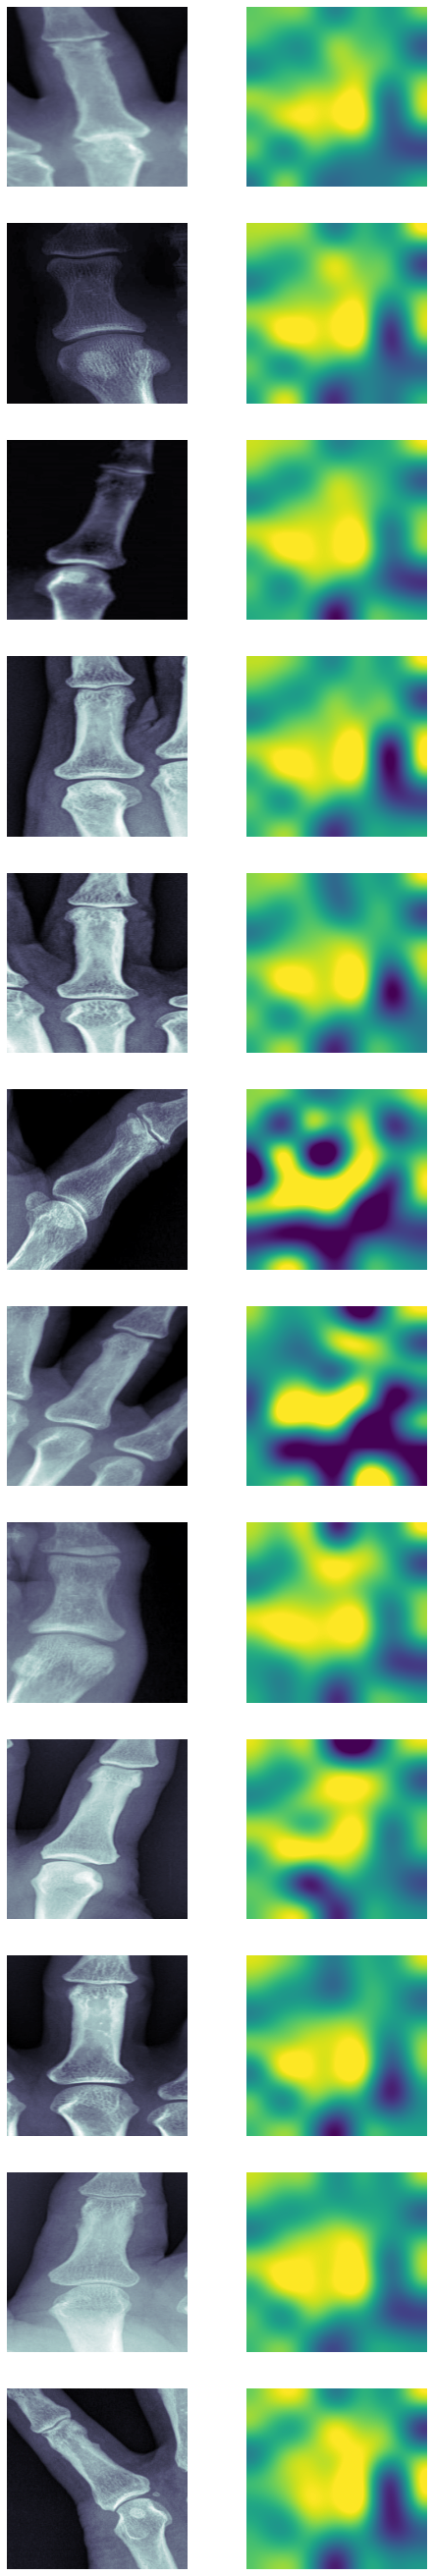

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in loaded_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

import keras.backend as K
rand_idx = np.random.choice(range(len(img)), size = 12)
attn_func = K.function(inputs = [loaded_model.get_input_at(0), K.learning_phase()],outputs = [attn_layer.get_output_at(0)])

fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = img[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')

# from 0.2701 rmse model

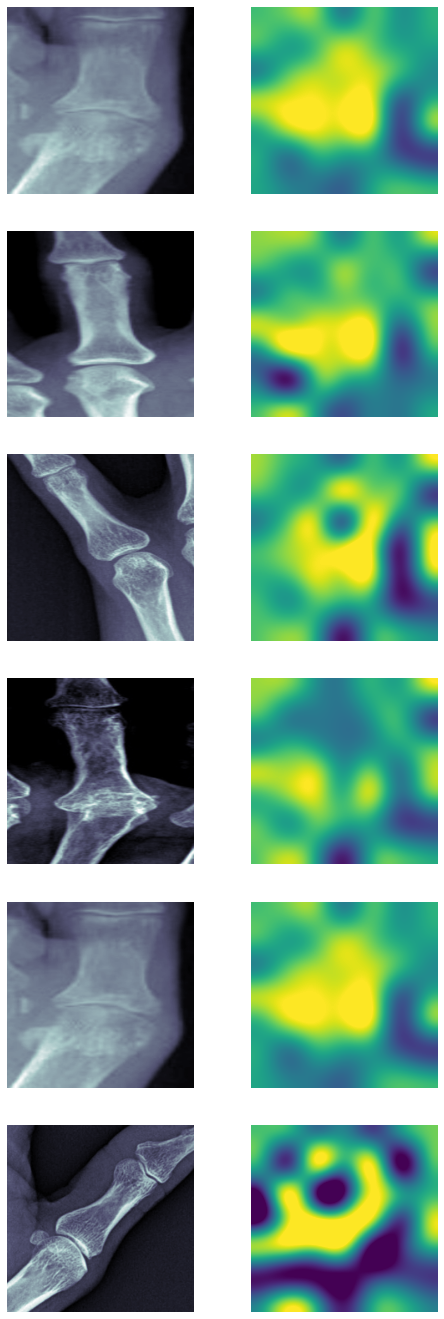

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in loaded_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

import keras.backend as K
rand_idx = np.random.choice(range(len(img)), size = 6)
attn_func = K.function(inputs = [loaded_model.get_input_at(0), K.learning_phase()],outputs = [attn_layer.get_output_at(0)])

fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = img[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')

In [ ]:
labels = pd.DataFrame(labels)
# labels.columns = ['label_' + str(i) for i in range(2)]
# labels['overall'] =np.sum(labels[labels.columns], axis = 1)
labels

,0,1
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
...,...,...
123,0.000,0.000
124,0.000,0.000
125,0.000,0.000
126,0.000,2.000


In [ ]:
preds = loaded_model.predict(img)
preds = pd.DataFrame(preds)
preds.columns = ['label_' + str(i) for i in range(2)]
preds['overall'] =np.sum(preds[preds.columns], axis = 1)
pd.DataFrame(preds)

,label_0,label_1,overall
0,0.000,0.000,0.000
1,0.000,0.000,0.000
2,0.049,0.000,0.049
3,0.000,0.000,0.000
4,0.234,0.000,0.234
...,...,...,...
123,0.000,0.000,0.000
124,0.000,0.000,0.000
125,0.000,0.000,0.000
126,0.032,0.000,0.032


In [ ]:
labels.to_csv('tru_labels.csv', index = False)
preds.to_csv('preds.csv', index = False)

In [ ]:
hand_ip_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch = len(train_ids)//8, 
                                                  validation_steps = len(val_ids)//8, callbacks = callbacks_list)

Epoch 1/300
68/68 [==============================] - 147s 2s/step - loss: 0.7903 - mae: 0.3349 - rmse: 0.4919 - val_loss: 0.7083 - val_mae: 0.2935 - val_rmse: 0.4436

Epoch 00001: val_rmse improved from inf to 0.44359, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/hand_ip_model_effnetB5_best.h5
Epoch 2/300
68/68 [==============================] - 57s 837ms/step - loss: 0.7396 - mae: 0.2952 - rmse: 0.4370 - val_loss: 0.7083 - val_mae: 0.2935 - val_rmse: 0.4436

Epoch 00002: val_rmse did not improve from 0.44359
Epoch 3/300
68/68 [==============================] - 57s 835ms/step - loss: 0.7887 - mae: 0.3044 - rmse: 0.4554 - val_loss: 0.7083 - val_mae: 0.2935 - val_rmse: 0.4436

Epoch 00003: val_rmse did not improve from 0.44359
Epoch 4/300
68/68 [==============================] - 57s 838ms/step - loss: 0.7403 - mae: 0.2956 - rmse: 0.4376 - val_loss: 0.7083 - val_mae: 0.2935 - val_rmse: 0.4436

Epoch 00004: val_rmse did not improve from 0.44359
Ep

KeyboardInterrupt: ignored

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits = 5)

In [ ]:
# for train_ids, val_ids in skf.split(foot_finger_erosion['Joint_image_ID'], foot_finger_erosion['label_0']):
#   epoch = 1
#   #Getting the training and validation joint IDS to deal with class imbalance in the prediction
#   train_joint_ids, val_joint_ids = foot_finger_erosion.iloc[train_ids]['Joint_image_ID'].tolist(), foot_finger_erosion.iloc[val_ids]['Joint_image_ID'].tolist()
#   train_joint_ids = [img + ".jpg" for img in train_joint_ids]
#   val_joint_ids = [img + ".jpg" for img in val_joint_ids]

#   #Train and valid generators
#   train_gen = RA_image_generator_rev(image_path, train_joint_ids, foot_finger_erosion, augment =False, batch_size = 16, max_size = 224, min_size = 224)
#   valid_gen = RA_image_generator_rev(image_path, val_joint_ids, foot_finger_erosion, augment=False,  batch_size = 16, max_size = 224, min_size = 224)
#   print("Training for Fold -> ", epoch)
#   #Training the model for first epoch
#   foot_finger_erosion_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 200, steps_per_epoch = len(train_ids)//16, 
#                                                   validation_steps = len(val_ids)//16, callbacks = callbacks_list)
#   epoch += 1

Training for Fold ->  1
Epoch 1/200
 70/146 [=============>................] - ETA: 7:57 - loss: 1.1457 - mae: 0.2639 - rmse: 0.2639

KeyboardInterrupt: ignored

# Training seperate model for erosion prediction and narrowing prediction for foot fingers

In [ ]:
foot_finger_erosion_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch=len(train_ids)//16, 
                                                  validation_steps = len(val_ids)//16, callbacks = callbacks_list)

Epoch 1/300
 41/137 [=======>......................] - ETA: 13:51 - loss: 3.1104 - mae: 0.7641 - rmse: 0.7641

KeyboardInterrupt: ignored

# Training with new generator

In [ ]:
foot_finger_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch=len(train_ids)//32, 
                                                  validation_steps = len(val_ids)//32, callbacks = callbacks_list)

Epoch 1/300
67/67 [==============================] - 78s 1s/step - loss: 1.6951 - mae: 0.4948 - rmse: 0.5980 - val_loss: 2.7188 - val_mae: 0.3594 - val_rmse: 0.4343

Epoch 00001: val_rmse improved from inf to 0.43434, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 2/300
67/67 [==============================] - 44s 660ms/step - loss: 1.3570 - mae: 0.3997 - rmse: 0.4880 - val_loss: 0.1250 - val_mae: 0.3423 - val_rmse: 0.4140

Epoch 00002: val_rmse improved from 0.43434 to 0.41404, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 3/300
67/67 [==============================] - 43s 648ms/step - loss: 1.0494 - mae: 0.3735 - rmse: 0.4459 - val_loss: 1.6875 - val_mae: 0.3312 - val_rmse: 0.4073

Epoch 00003: val_rmse improved from 0.41404 to 0.40730, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_mode

# EFFICIENTNET

In [ ]:
foot_finger_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch=len(train_ids)//16, 
                                                  validation_steps = len(val_ids)//16, callbacks = callbacks_list)

Epoch 1/300
135/135 [==============================] - 1180s 9s/step - loss: 1.2178 - mae: 0.4107 - rmse: 0.4934 - val_loss: 0.9761 - val_mae: 0.4519 - val_rmse: 0.5314

Epoch 00001: val_rmse improved from inf to 0.53139, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 2/300
135/135 [==============================] - 184s 1s/step - loss: 0.7919 - mae: 0.2997 - rmse: 0.3702 - val_loss: 0.6661 - val_mae: 0.3121 - val_rmse: 0.3879

Epoch 00002: val_rmse improved from 0.53139 to 0.38791, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 3/300
135/135 [==============================] - 98s 725ms/step - loss: 0.6712 - mae: 0.2824 - rmse: 0.3471 - val_loss: 0.5425 - val_mae: 0.3142 - val_rmse: 0.3899

Epoch 00003: val_rmse did not improve from 0.38791
Epoch 4/300
135/135 [==============================] - 95s 706ms/step - loss: 0.4710 - mae: 0.2380 - rm

#FROM DENSENET

In [ ]:
foot_finger_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 200, steps_per_epoch=len(train_ids)//16, 
                                                  validation_steps = len(val_ids)//16, callbacks = callbacks_list)

Epoch 1/200
135/135 [==============================] - 1217s 9s/step - loss: 2.0303 - mae: 0.5164 - rmse: 0.6115 - val_loss: 1.7500 - val_mae: 0.4118 - val_rmse: 0.4826

Epoch 00001: val_rmse improved from inf to 0.48260, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 2/200
135/135 [==============================] - 179s 1s/step - loss: 1.9370 - mae: 0.4500 - rmse: 0.5328 - val_loss: 4.5625 - val_mae: 0.3569 - val_rmse: 0.4275

Epoch 00002: val_rmse improved from 0.48260 to 0.42746, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5
Epoch 3/200
135/135 [==============================] - 107s 790ms/step - loss: 1.7688 - mae: 0.4264 - rmse: 0.5084 - val_loss: 1.6719 - val_mae: 0.3347 - val_rmse: 0.4023

Epoch 00003: val_rmse improved from 0.42746 to 0.40233, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_fing

# Load the trained model for Foot fingers

In [ ]:
# DL libraries
import keras.backend as K
import tensorflow as tf
from keras.models import load_model

model_weights = '/content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_model_best.h5'
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

depend = {'rmse': rmse}
loaded_model = load_model(model_weights,  custom_objects = depend)

In [ ]:
img, labels = next(RA_image_generator(image_path, val_ids, foot_finger, augment=False,  batch_size = 32, size = 224))

# Visualizing attention weights 

## Densenet didn't learn to focus on necessary areas in the images

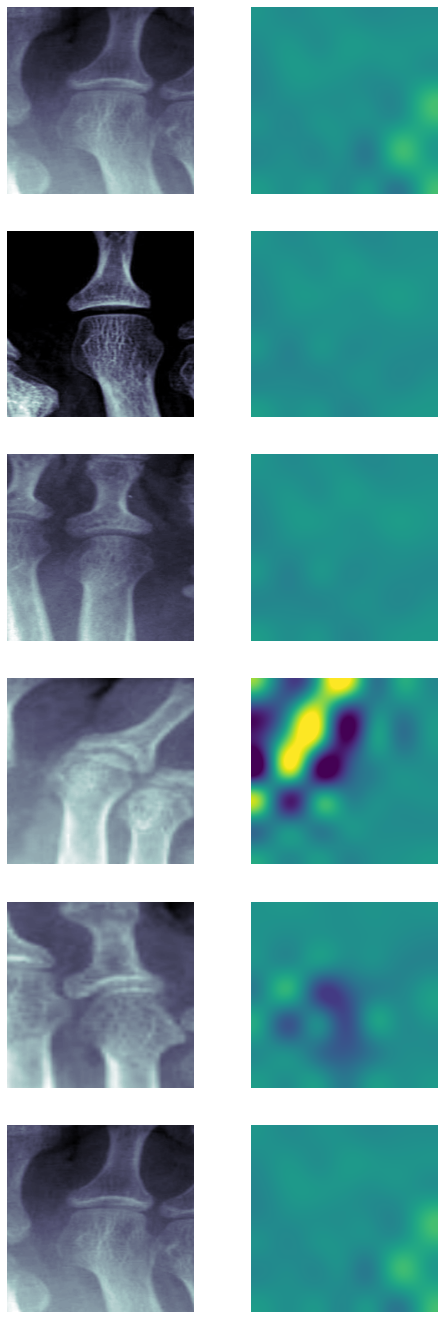

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in loaded_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

import keras.backend as K
rand_idx = np.random.choice(range(len(img)), size = 6)
attn_func = K.function(inputs = [loaded_model.get_input_at(0), K.learning_phase()],outputs = [attn_layer.get_output_at(0)])

fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = img[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')

In [ ]:
# preds = pd.DataFrame(loaded_model.predict(img))
# preds

In [ ]:
# pd.DataFrame(labels)

## Using EfficientNet B3 

In [ ]:
!pip install git+https://github.com/qubvel/efficientnet
from efficientnet.keras import EfficientNetB3

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-wpw65owc
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-wpw65owc
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18327 sha256=e3cd7c417af6420f39e4e8c73710c80d3d2f64bd7ccf3ad5edbca5ddd0307c79
  Stored in directory: /tmp/pip-ephem-wheel-cache-wy1jkeiy/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [ ]:
!pip install keras-radam

  Created wheel for keras-radam: filename=keras_radam-0.15.0-cp36-none-any.whl size=14685 sha256=4a2ce43f489e8f8306b1f5dfbcd241524141bf39dfec74160af48954c9b2ae25
  Stored in directory: /root/.cache/pip/wheels/79/a0/c0/670b0a118e8f078539fafec7bd02eba0af921f745660c7f83f
Successfully built keras-radam


In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications 
from keras_radam import RAdam
from keras.applications.resnet50 import ResNet50


ROWS = 224
COLS = 224
input_shape = (ROWS, COLS, 3)

def get_model(model_type, backbone = 'Inception'):
    if model_type == 'wrist':
        output_size = 12
    elif model_type == 'hand_finger':
        output_size = 4
    elif model_type == "foot_finger":
        output_size= 2
    elif model_type == "hand_ip":
        output_size = 3
        
    if backbone == 'Inception':
        base_model = applications.InceptionV3(weights='/content/drive/My Drive/RA2/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                                include_top=False, 
                                input_shape=(ROWS, COLS,3))
    elif backbone == 'VGG':
        base_model = applications.InceptionV3(weights='../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                                include_top=False, 
                                input_shape=(ROWS, COLS,3))
    elif backbone == 'Densenet':
        base_model = applications.InceptionV3(weights='../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                                include_top=False, 
                                input_shape=(ROWS, COLS,3))
    elif backbone == 'efficientnet':
        base_model = EfficientNetB3(weights='/content/drive/My Drive/RA2/efficientnet-b3_imagenet_1000_notop.h5', include_top=False, input_shape=(ROW, COLS, 3))
    elif backbone == 'resnet':
        base_model = ResNet50(weights = '/content/drive/My Drive/RA2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', incLude_top =False, input_shape = (ROW, COLS, 3))


    # base_model.summary()

    for layer in base_model.layers[:200]:
        layer.trainable = False
    for layer in base_model.layers[200:]:
        layer.trainable = True

    base_model.summary()

    add_model = Sequential()
    add_model.add(base_model)
    add_model.add(GlobalAveragePooling2D())
    add_model.add(Dense(1024, activation = 'relu'))
    add_model.add(Dense(256, activation ='relu'))
    add_model.add(Dense(output_size, activation='relu'))
    add_model.compile(loss='mse', metrics=['mae', rmse],optimizer=RAdam(learning_rate=0.00005))
    
    return add_model

## Efficient net

In [ ]:
foot_finger_model_v2 = get_model('foot_finger', 'efficientnet')
model_snapshot_path = "/content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/" 
weight_path= model_snapshot_path + "{}_best.h5".format('foot_finger_effnet_model')
#Checkpoint for saving the model
checkpoint = ModelCheckpoint(weight_path, monitor='val_rmse', verbose=1, save_best_only=True, mode='min')
#Reducing the learning rate if model doesn't improve in 5 epochs
reduceLROnPlat = ReduceLROnPlateau(monitor='val_rmse', factor=0.3, patience=5, verbose=1, mode='auto', epsilon = 0.0001, cooldown = 10, min_lr= 0.0001)

#Early stopping patinets of 25
early = EarlyStopping(monitor="val_rmse", mode="min", 
                      patience = 100) # probably needs to be more patient, but kaggle time is limited

callbacks_list = [checkpoint, early, reduceLROnPlat]
gc.collect()

Model: "efficientnet-b3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        input_8[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 40) 0           stem_bn[0][0]                    
____________________________________________________________________________________

243

In [ ]:
foot_finger_model_v2.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 200, steps_per_epoch=len(train_ids)//4, validation_steps = len(val_ids)//4, callbacks = callbacks_list)

Epoch 1/200
542/542 [==============================] - 229s 422ms/step - loss: 1.6840 - mae: 0.5511 - rmse: 0.6515 - val_loss: 1.8171 - val_mae: 0.4522 - val_rmse: 0.5271

Epoch 00001: val_rmse improved from inf to 0.52706, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/foot_finger_effnet_model_best.h5
Epoch 2/200
542/542 [==============================] - 211s 389ms/step - loss: 1.7809 - mae: 0.5615 - rmse: 0.6646 - val_loss: 0.2916 - val_mae: 0.4689 - val_rmse: 0.5456

Epoch 00002: val_rmse did not improve from 0.52706
Epoch 3/200
542/542 [==============================] - 211s 389ms/step - loss: 1.7748 - mae: 0.5599 - rmse: 0.6615 - val_loss: 1.3211 - val_mae: 0.4558 - val_rmse: 0.5341

Epoch 00003: val_rmse did not improve from 0.52706
Epoch 4/200
542/542 [==============================] - 212s 391ms/step - loss: 1.8366 - mae: 0.5714 - rmse: 0.6733 - val_loss: 0.1375 - val_mae: 0.4547 - val_rmse: 0.5301

Epoch 00004: val_rmse did not improve

# InceptionV3

In [ ]:
foot_finger_model_v2 = get_model('foot_finger', 'Inception')
model_snapshot_path = "/content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/" 
weight_path= model_snapshot_path + "{}_best.h5".format('foot_finger_effnet_model_incpetion')
#Checkpoint for saving the model
checkpoint = ModelCheckpoint(weight_path, monitor='val_rmse', verbose=1, save_best_only=True, mode='min')
#Reducing the learning rate if model doesn't improve in 5 epochs
reduceLROnPlat = ReduceLROnPlateau(monitor='val_rmse', factor=0.3, patience=5, verbose=1, mode='auto', epsilon = 0.0001, cooldown = 10, min_lr= 0.0001)

#Early stopping patinets of 25
early = EarlyStopping(monitor="val_rmse", mode="min", 
                      patience = 100) # probably needs to be more patient, but kaggle time is limited

callbacks_list = [checkpoint, early, reduceLROnPlat]
gc.collect()

In [ ]:
foot_finger_model_v2.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 200, steps_per_epoch=len(train_ids)//4, validation_steps = len(val_ids)//4, callbacks = callbacks_list)

# Resnet50

In [ ]:
foot_finger_model_v2 = get_model('foot_finger', 'resnet')
model_snapshot_path = "/content/drive/My Drive/RA2/Joint level model/Models/Foot finger models/" 
weight_path= model_snapshot_path + "{}_best.h5".format('foot_finger_effnet_model_resnet')
#Checkpoint for saving the model
checkpoint = ModelCheckpoint(weight_path, monitor='val_rmse', verbose=1, save_best_only=True, mode='min')
#Reducing the learning rate if model doesn't improve in 5 epochs
reduceLROnPlat = ReduceLROnPlateau(monitor='val_rmse', factor=0.3, patience=5, verbose=1, mode='auto', epsilon = 0.0001, cooldown = 10, min_lr= 0.0001)

#Early stopping patinets of 25
early = EarlyStopping(monitor="val_rmse", mode="min", 
                      patience = 100) # probably needs to be more patient, but kaggle time is limited

callbacks_list = [checkpoint, early, reduceLROnPlat]
gc.collect()

In [ ]:
foot_finger_model_v2.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 200, steps_per_epoch=len(train_ids)//4, validation_steps = len(val_ids)//4, callbacks = callbacks_list)